In [2]:
import pandas as pd
import swifter
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
import h5py

In [2]:
%load_ext Cython

In [81]:
!pip install -U tables numpy h5py

Requirement already up-to-date: tables in c:\users\richard\appdata\local\programs\python\python37\lib\site-packages (3.5.1)
Requirement already up-to-date: h5py in c:\users\richard\appdata\local\programs\python\python37\lib\site-packages (2.9.0)
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Richard\\AppData\\Local\\Temp\\pip-uninstall-k5ga3u1q\\users\\richard\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\numpy\\.libs\\libopenblas.csrrd7hkrkc3t3yxa7vy7tazglswdkw6.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
data = pd.read_hdf('../data/train_encoded.h5', key="df", mode="r")
# data.set_index('train_id', inplace=True)
# data = data.iloc[:600000]

# print(test_data.shape)
print(data.shape)
# print(stg2_data.shape)

data['item_description'].fillna("", inplace=True)
data.columns.values

(800000, 2855)


array(['price', 'shipping', 'item_description', ...,
       '2_category_Yoga & Pilates', '2_category_iPad', '2_category_nan'],
      dtype=object)

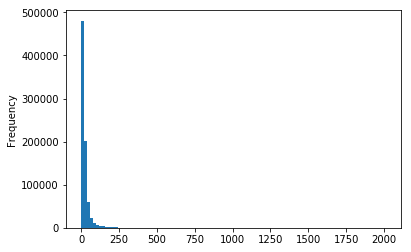

In [6]:
data["price"].plot.hist(bins=100)

c:\users\richard\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


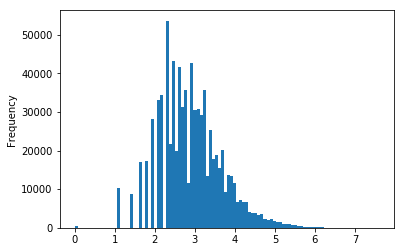

In [7]:
data["log_price"] = np.where(data["price"] == 0, 0, np.log(data["price"]))
data["log_price"].plot.hist(bins=100)
data["price_cat"] = pd.cut(data["log_price"], 6)

### One hot encoding of the categories, brand name, item condition

In [8]:
# # item_condition_id
# encoded_item_condition_id = pd.get_dummies(data["item_condition_id"], prefix="item_condition_id", dummy_na=True)
# data = pd.concat([data, encoded_item_condition_id], axis=1)
# data = data.drop("item_condition_id", axis=1)
# print("Encoded  ...  item_condition_id ")

# # brand_name
# encoded_brand_name = pd.get_dummies(data["brand_name"], prefix="brand_name", dummy_na=True)
# data = pd.concat([data, encoded_brand_name], axis=1)
# data = data.drop("brand_name", axis=1)
# print("Encoded  ...  brand_name ")

# # 0_category
# encoded_category_0 = pd.get_dummies(data["0_category"], prefix="0_category", dummy_na=True)
# data = pd.concat([data, encoded_category_0], axis=1)
# data = data.drop("0_category", axis=1)
# print("Encoded  ...  0_category ")

# # 1_category
# encoded_category_1 = pd.get_dummies(data["1_category"], prefix="1_category", dummy_na=True)
# data = pd.concat([data, encoded_category_1], axis=1)
# data = data.drop("1_category", axis=1)
# print("Encoded  ...  1_category ")

# # 2_category
# encoded_category_2 = pd.get_dummies(data["2_category"], prefix="2_category", dummy_na=True)
# data = pd.concat([data, encoded_category_2], axis=1)
# data = data.drop("2_category", axis=1)
# print("Encoded  ...  2_category ")

# data.head()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("price", axis=1), data["price"], stratify=data["price_cat"], test_size=0.2, random_state=0)

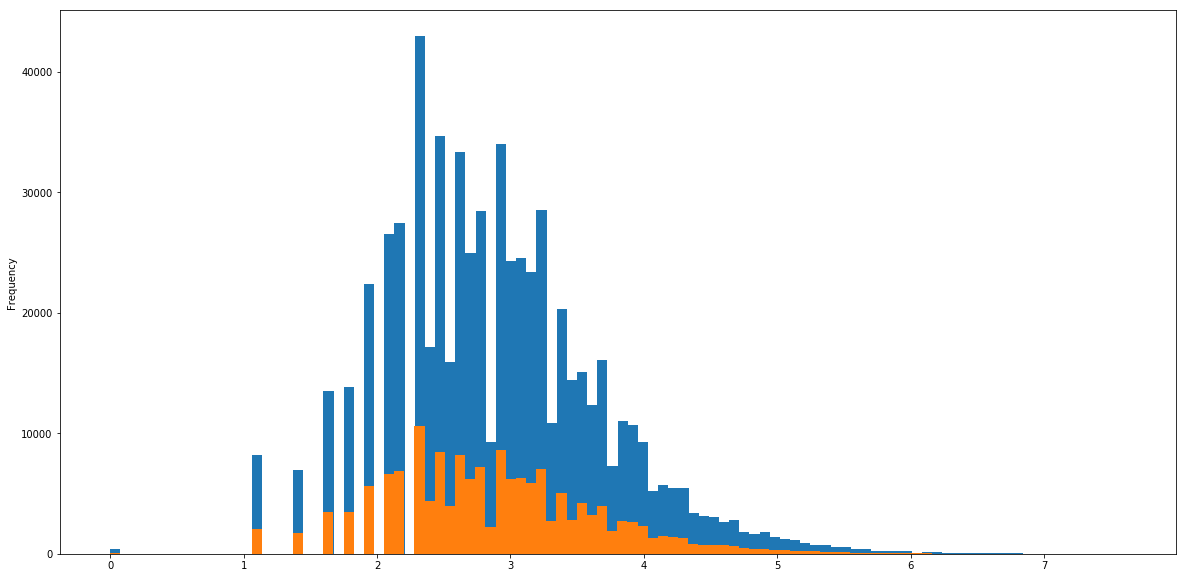

In [10]:
plt.figure(figsize=(20, 10))
X_train["log_price"].plot.hist(bins=100)
# print(X_train.describe())
X_test["log_price"].plot.hist(bins=100)
# print(X_test.describe())

In [31]:
# data = X_train
data = X_test
data.head()

,shipping,item_description,name_and_brand,item_condition_id_1.0,item_condition_id_2.0,item_condition_id_3.0,item_condition_id_4.0,item_condition_id_5.0,item_condition_id_nan,brand_name_% Pure,...,2_category_Work & Safety,2_category_Wrap,2_category_Wristlet,2_category_Writing,2_category_Yarn,2_category_Yoga & Pilates,2_category_iPad,2_category_nan,log_price,price_cat
train_id,,,,,,,,,,,,,,,,,,,,,
734747,1,Super Nintendo Dracula Works n ready to be play,Dracula snes Nintendo,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2.708050,"(2.535, 3.803]"
591923,0,"New with tags Not forever 21, Zara, American a...",Black waterfall trench H&M,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.772589,"(2.535, 3.803]"
741644,1,All 3 for only 15$,iPhone 3ft+6ft+10ft USB charger cables Unknown,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.708050,"(2.535, 3.803]"
636883,1,Lularoe classic tee xs with vintage look. Unwo...,Lularoe classic tee xs Unknown,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.091042,"(2.535, 3.803]"
697596,1,New with tags,New Tom Brady Super Bowl Patriots Jersey Nike,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.007333,"(3.803, 5.07]"


## Predspracovanie

### Separate Category to 3 categories

In [ ]:
category_path_max = 3
data['categories'] = data['category_name'].apply(lambda x: x.split('/') if isinstance(x, str) else [np.nan,np.nan,np.nan])
for i in range(category_path_max):
  data[str(i) + '_category'] = data['categories'].apply(lambda x: x[i] if len(x) > i else np.nan)

data = data.drop(['categories', 'category_name'], 1)
data.head()

### Brand name - all less than 4 appearances is other, combine with name

In [9]:
data["brand_name"] = data["brand_name"].fillna("Unknown")
data["name_and_brand"] = data["name"].map(str) + ' ' + data["brand_name"].map(str)

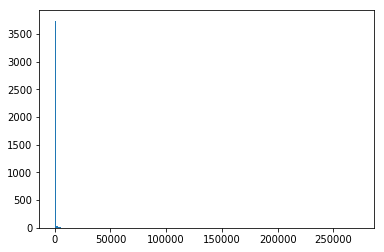

In [10]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

In [11]:
vc = data["brand_name"].value_counts() < 5
mask = pd.DataFrame(vc[vc])
data.loc[data["brand_name"].isin(mask.index), "brand_name"] = "Other"


data["brand_name"].value_counts()["Other"]

3708

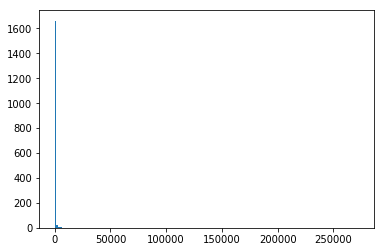

In [12]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

### Brand name vectorized using Doc2Vec

In [13]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, ToktokTokenizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import re

TOKEN_PATTERN = (
            r'(?u)('
            r'"|'  # for inches
            r'\&|'  # & (e.g. in H&M)
            r'!+|'  # !
            r'\.\d+\b|'  # .25
            r'\b\d+\/\d+\b|'  # 1/2
            r'\b\d+\.?\d*\%|'  # 100.1%
            r'\b\d+\.?\d*\b|'  # 0.25
            r'[\:\;\%][\)\(]|'  # TODO more smilies
            r'[' + ''.join([
        '•', '❤', '✨', '$', '❌', '♡', '☆', '✔', '⭐',
        '✅', '⚡', '‼', '—', '▪', '❗', '■', '●', '➡',
        '⛔', '♦', '〰', '×', '⚠', '°', '♥', '★', '®', '·', '☺', '–', '➖',
        '✴', '❣', '⚫', '✳', '➕', '™', 'ᴇ', '》', '✖', '▫', '¤',
        '⬆', '⃣', 'ᴀ', '❇', 'ᴏ', '《', '☞', '❄', '»', 'ô', '❎', 'ɴ', '⭕', 'ᴛ',
        '◇', 'ɪ', '½', 'ʀ', '❥', '⚜', '⋆', '⏺', '❕', 'ꕥ', '：', '◆', '✽',
        '…', '☑', '︎', '═', '▶', '⬇', 'ʟ', '！', '✈', '�', '☀', 'ғ',
    ]) + ']|'  # various symbols
         r'\b\w+\b'  # word
         r')')

ps = PorterStemmer()
WORD = re.compile(TOKEN_PATTERN)

def tokenize(x):    
    words = WORD.findall(x)
    res = []
    for word in words:
        res.append(ps.stem(word))
    return res


In [32]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

documents = []
i = 0

def process(x, pbar):
    global documents, i
    res = tokenize(x)
    documents.append(TaggedDocument(words=res, tags=[i]))
    i += 1
    pbar.update(1)
    return res
    
print('Tokenizing ITEM_DESCRIPTION')
with tqdm(total=data.shape[0], mininterval=30) as pbar:
    data["item_descriptions"] = data["item_description"].apply(lambda x: process(x, pbar))


Tokenizing ITEM_DESCRIPTION


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [01:58<00:00, 1354.31it/s]


In [33]:
print('Tokenizing BRAND_NAME')
with tqdm(total=data.shape[0], mininterval=30) as pbar:
    data["name_and_brand_t"] = data["name_and_brand"].apply(lambda x: process(x, pbar))


Tokenizing BRAND_NAME


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [00:24<00:00, 6403.71it/s]


In [20]:
print(len(documents))
documents[:5]

2372056


[TaggedDocument(words=['_brand', 'new', 'and', 'unworn', '!!', '_cute', 'totoro', 'design', 'on', 'the', 'front', '_ha', 'cute', 'totoro', 'ear', 'on', 'the', 'hoodi'], tags=[0]),
 TaggedDocument(words=['brand', 'new', 'never', 'worn', 'veri', 'pretti', 'for', 'a', 'sporti', 'girl', 'sold', 'for', '40.00', 'set', 'up', 'and', 'work', 'perfect'], tags=[1]),
 TaggedDocument(words=['lularo', 'one', 'size', 'leg', 'excel', 'use', 'condit', 'wash', 'and', 'hung', 'to', 'dri', 'accord', 'to', 'llr', 'standard', 'I', 'm', 'open', 'to', 'offer', 'and', 'also', 'have', 'free', 'ship'], tags=[2]),
 TaggedDocument(words=['worn', 'twice', 'they', 'are', 'too', 'big', 'on', 'me', 'need', 'to', 'go', 'a', 'size', 'or', 'two', 'down', 'perfect', 'condit', 'paid', '110', 'with', 'ship', 'for', 'these', 'no', 'lowbal', 'pleas'], tags=[3]),
 TaggedDocument(words=['color', 'splash', 'didn', 't', 'work', 'for', 'me'], tags=[4])]

In [310]:
start_alpha = 0.025
min_alpha = 0.008
epochs = 20
vector_size = 64
step = (start_alpha - min_alpha) / epochs

model = Doc2Vec(alpha=start_alpha, min_alpha=start_alpha, vector_size=vector_size, window=7, workers=4)  # use fixed learning rate
model.build_vocab(documents)

In [320]:
model.alpha = 0.025
epochs = 10

In [321]:
for epoch in tqdm(range(epochs)):
    model.train(documents, total_examples=model.corpus_count, epochs=1)
    model.alpha -= step  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
    print(f'Epoch {epoch} finished. Alpha: {model.alpha}')









  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

Epoch 0 finished. Alpha: 0.02415










 10%|████████████████▌                                                                                                                                                    | 1/10 [02:30<22:31, 150.18s/it]

Epoch 1 finished. Alpha: 0.0233










 20%|█████████████████████████████████                                                                                                                                    | 2/10 [05:06<20:16, 152.04s/it]

Epoch 2 finished. Alpha: 0.02245










 30%|█████████████████████████████████████████████████▌                                                                                                                   | 3/10 [07:40<17:47, 152.49s/it]

Epoch 3 finished. Alpha: 0.0216










 40%|██████████████████████████████████████████████████████████████████                                                                                                   | 4/10 [10:14<15:18, 153.05s/it]

Epoch 4 finished. Alpha: 0.02075










 50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 5/10 [12:46<12:43, 152.75s/it]

Epoch 5 finished. Alpha: 0.0199










 60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 6/10 [15:21<10:13, 153.33s/it]

Epoch 6 finished. Alpha: 0.01905










 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 7/10 [17:52<07:38, 152.83s/it]

Epoch 7 finished. Alpha: 0.0182










 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 8/10 [20:26<05:06, 153.08s/it]

Epoch 8 finished. Alpha: 0.01735










 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 9/10 [22:59<02:33, 153.07s/it]

Epoch 9 finished. Alpha: 0.0165










100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [25:31<00:00, 152.88s/it]

In [347]:
model.save("doc2vec/doc2vec-30ep.mdl")

In [17]:
model = Doc2Vec.load("doc2vec/doc2vec-30ep.mdl")

## Experiment with DOC2VEC

In [25]:
rand_doc = 1120561
print(documents[rand_doc])
res_docs = model.docvecs.most_similar([rand_doc])
for doc_id, sim in res_docs:
    print(doc_id, sim, documents[doc_id])

TaggedDocument(['victoria', 'secret', 'love', 'pink', 'brand', 'new', 'lanyard'], [1120561])
249932 0.9679811000823975 TaggedDocument(['victoria', 'secret', 'love', 'pink', 'lanyard', 'brand', 'new', 'come', 'from', 'smoke', 'free', 'home'], [249932])
713103 0.963517963886261 TaggedDocument(['VS', 'love', 'pink', 'lanyard', 'free', 'ship'], [713103])
724641 0.9617636799812317 TaggedDocument(['Vs', 'pink', 'love', 'lanyard', '2', 'lanyard', 'new', 'fast', 'ship', '!'], [724641])
63070 0.9588600993156433 TaggedDocument(['brand', 'new', 'victoria', 's', 'secret', 'love', 'pink', 'lanyard', 'come', 'from', 'smoke', 'free', 'home', 'will', 'ship', 'within', '24', 'hour'], [63070])
1029182 0.955751359462738 TaggedDocument(['white', 'pink', 'lanyard', 'black', 'white', 'lanyard'], [1029182])
886380 0.950320839881897 TaggedDocument(['licens', 'nfl', 'heavi', 'duti', 'lanyard'], [886380])
1020557 0.9493449926376343 TaggedDocument(['wallet', 'is', 'in', 'pristin', 'condit', 'genuin', 'leather'],

In [38]:
model.wv.most_similar(['brand'])

[('york', 0.6748981475830078),
 ('unus', 0.6235029101371765),
 ('bran', 0.5817394256591797),
 ('like', 0.5515947937965393),
 ('seal', 0.5413249731063843),
 ('unopen', 0.5282155871391296),
 ('era', 0.48420602083206177),
 ('com', 0.44668030738830566),
 ('unseal', 0.445159912109375),
 ('athent', 0.4445577561855316)]

In [27]:
%%time
model.wv.get_vector('iphon')

Wall time: 0 ns


array([-0.87403476, -0.16031708, -1.1511667 ,  1.6411891 ,  0.7869541 ,
       -0.17931408, -1.455016  ,  0.43970412, -1.1861469 , -1.5558368 ,
        0.58093125,  1.8160192 , -1.6284019 , -0.797974  , -0.73069704,
       -0.5472965 , -0.647805  ,  0.6837578 , -0.37566543,  1.6648191 ,
        1.3782175 ,  1.3182316 , -0.23992983,  1.3806993 ,  0.42935336,
        0.5956174 ,  0.11946667, -0.16917235,  1.4956875 ,  0.5942216 ,
       -1.02505   ,  1.2948539 ,  0.22487663, -1.09493   , -2.1197076 ,
       -1.3579506 ,  0.17314313, -1.2451756 , -1.7598875 , -0.7000126 ,
        0.18085107,  0.40096894, -0.10484356, -0.6308375 , -0.55120677,
        2.1283267 , -1.1556367 ,  0.998839  , -1.5898374 , -0.6887702 ,
       -1.7834489 ,  0.8969812 ,  0.9041663 ,  0.9282208 , -0.8326491 ,
       -0.01320396,  2.1047351 ,  1.5974    , -1.4392056 , -2.0672677 ,
        0.9637646 , -1.7187356 , -1.259565  ,  0.9929442 ], dtype=float32)

In [33]:
doc = documents[1120561]
words = data["name_and_brand_t"][0]
print(words)
res1 = model.infer_vector(words, steps=25)
print(res1)

['mlb', 'cincinnati', 'red', 'T', 'shirt', 'size', 'XL', 'unknown']
[-0.6165946  -0.09001246 -0.20319712 -0.25237793  0.57633966  0.03693875
 -0.35144842 -0.07201497 -0.12659022 -0.02909094  0.4712811  -0.07273448
 -0.32679904 -0.05506153 -0.56677943 -0.01134105  0.17250285 -0.07311574
 -0.16357708 -0.182317    0.19092947  0.08346301 -0.00657347 -0.05109016
 -0.16672996 -0.40400243  0.31109503 -0.17673165 -0.0949478  -0.21658745
 -0.4098329  -0.367276   -0.4807688  -0.13765009 -0.45753127 -0.07961261
 -0.5929314   0.05505434 -0.08064529 -0.17024912  0.40339005 -0.17345423
 -0.19341189 -0.2776517  -0.2676793   0.13341968 -0.42389718 -0.17280853
 -0.02041231 -0.10208726  0.02519474  0.066053    0.24845022  0.05316225
  0.22817792 -0.02037785 -0.5482394   0.31337398 -0.510842   -0.0797871
 -0.14572656  0.19137947 -0.1667813   0.15636583]


In [27]:
doc = documents[99060]
print(doc)
res2 = model.infer_vector(doc.words, steps=25)
print(res2)

TaggedDocument(['victoria', 's', 'secret', 'pink', 'lanyard', 'new', 'with', 'tag'], [99060])
[-0.40597925  0.05514718 -0.23040894 -0.05734293  0.66990197 -0.22668251
 -0.37756255  0.03393262  0.11129758  0.08673667  0.21176073  0.2568399
 -0.2829131  -0.11374829 -0.3209967  -0.05682763  0.45046046 -0.15554887
 -0.39010856 -0.09288694  0.30053133  0.31025285  0.0302855  -0.14681898
 -0.22813745 -0.11600266  0.2855468  -0.06702566  0.23126605 -0.0132272
 -0.3283537  -0.11330844 -0.5617831  -0.63772005 -0.31271878 -0.08560163
 -0.29102525  0.13825798  0.05673973  0.2716729   0.5523974  -0.02318978
 -0.45596275 -0.13404095 -0.44207335 -0.0892358  -0.34840083  0.01685966
  0.03945239 -0.10276377 -0.24163096 -0.19109148  0.4431767  -0.03878426
  0.32715625  0.03588001 -0.47960424  0.23348543 -0.28435257 -0.11317686
  0.0865595   0.45545778 -0.16007756  0.06803258]


In [53]:
%%time
model.infer_vector(doc.words, steps=25)

Wall time: 2 ms


array([-0.24000369, -0.07215226, -0.09802584, -0.04310709,  0.67484903,
        0.03399444, -0.146487  ,  0.07858206,  0.12423464,  0.1705699 ,
        0.19304574,  0.24796052, -0.24772353, -0.14450867, -0.33250555,
        0.06498234,  0.57789874, -0.17521991, -0.29078993, -0.03671257,
        0.23723255,  0.23525968,  0.03146777, -0.19512805, -0.24135262,
       -0.01225074,  0.35022345, -0.12943733,  0.09247729,  0.10099661,
       -0.38543493, -0.11431763, -0.4692628 , -0.6651002 , -0.18608071,
       -0.17668223, -0.01201531,  0.14355502,  0.12315057,  0.3263758 ,
        0.48800385, -0.15742156, -0.29169816, -0.04373288, -0.33361962,
       -0.18115386, -0.33461967,  0.05578777,  0.10926019, -0.15053707,
       -0.4362387 , -0.23239017,  0.3716067 , -0.1181711 ,  0.34797424,
        0.03278778, -0.33431724,  0.17496501,  0.18251707, -0.23402643,
        0.2678775 ,  0.45312035, -0.20074664,  0.24699424], dtype=float32)

In [29]:
cosine_similarity(res1.reshape(1, -1), res2.reshape(1, -1))

array([[0.90424216]], dtype=float32)

### Encode DESCRIPTION to document vector representation

In [34]:
data["description_embed"] = data["item_descriptions"].swifter.apply(lambda x: model.infer_vector(x, steps=25))

Pandas Apply: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [04:25<00:00, 602.10it/s]


In [35]:
data["name_brand_embed"] = data["name_and_brand_t"].swifter.apply(lambda x: model.infer_vector(x, steps=25))

Pandas Apply: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [01:59<00:00, 1341.44it/s]


In [46]:
# final_data = data.drop(["price_cat", "log_price", "item_decription", "name_and_brand"])
# data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480000 entries, 379101 to 88075
Columns: 2769 entries, shipping to name_brand63
dtypes: category(1), float32(128), float64(1), int64(1), object(6), uint8(2632)
memory usage: 1.5+ GB


In [36]:
matrix_desc = np.stack(data["description_embed"])
for i in range(matrix_desc.shape[1]):
    data['description_' + str(i)] = matrix_desc[:, i]

In [37]:
matrix_name_brand = np.stack(data["name_brand_embed"])
for i in range(matrix_name_brand.shape[1]):
    data['name_brand' + str(i)] = matrix_name_brand[:, i]

In [24]:
data["description_embed"]

train_id
593477    [-0.52926517, 0.21387348, -0.7287413, 0.052165...
481848    [-0.5090644, -0.24426103, -0.37597382, -0.4510...
616526    [0.19017582, 0.22788908, 0.43844843, -0.267941...
716828    [-0.41432196, 0.7684331, 0.5961291, 0.31302005...
530826    [-0.07080025, -0.07891894, -0.11913533, -0.057...
276286    [-0.27838993, 0.9982063, -0.28050348, 0.078180...
287823    [-0.2234064, -0.011892255, -0.17732446, -0.045...
658455    [-0.030423317, 0.09569126, 0.20227462, -0.4038...
396696    [-0.04423541, 0.005460765, -0.078536026, -0.03...
265786    [-0.6030664, 0.049470797, 0.28731844, -0.08125...
752751    [-0.21518964, 0.1714736, 0.50008506, -0.212162...
311806    [-2.3722386, -1.0085287, -0.5395566, -0.627711...
164800    [-0.5353841, 0.3502249, -0.5067775, -0.0599576...
33837     [0.2598653, -0.18405534, 0.19734977, -0.334997...
753581    [0.4046161, 0.027445594, -0.010365827, 0.24425...
348659    [-0.3562129, 0.019812807, -0.13138862, -0.0995...
174364    [-0.21655875, -0.3131

In [38]:
final_data = data.select_dtypes(exclude=['float64', 'category', 'object'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 734747 to 317091
Columns: 2980 entries, shipping to name_brand63
dtypes: float32(128), int64(1), uint8(2851)
memory usage: 515.6 MB


In [39]:
# final_data.to_hdf('train_final.h5', key='df', mode='w')
final_data.to_hdf('validation_final.h5', key='df', mode='w')

In [46]:
train, validation = pd.DataFrame(y_train), pd.DataFrame(y_test)

In [47]:
train.to_hdf("y_train.h5", key="df", mode="w")
validation.to_hdf("y_validation.h5", key="df", mode="w")

### Description extract TF-IDF

In [16]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
import numpy as np
import pandas as pd
import swifter


class Doc2VecModel():
    def __init__(self, filename):
        self.filename = filename
        self.model = None
        self.window = 5

    def fit_transform(self, documents, epochs=30, start_alpha=0.025, min_alpha=0.008, vector_size=32):
        print(f'Fit transform {documents.shape} documents for {epochs} epochs .....')
        self.model = Doc2Vec(alpha=start_alpha, min_alpha=start_alpha, vector_size=vector_size, window=self.window, workers=4)
        self.model.build_vocab(documents)

        step = (start_alpha - min_alpha) / epochs

        for epoch in range(epochs):
            self.model.train(documents, total_examples=self.model.corpus_count, epochs=1)
            self.model.alpha -= step  # decrease the learning rate
            self.model.min_alpha = self.model.alpha  # fix the learning rate, no decay
            print(f'Epoch {epoch} finished. Alpha: {self.model.alpha}')

        doc_df = pd.DataFrame(np.arange(len(documents)), columns='tags')
        doc_df['vectors'] = doc_df['tags'].swifter.apply(lambda x: self.model.docvecs[str(x)])

        # Stop training
        self.model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
        self.model.save(self.filename)

        return doc_df['vectors']

    def transform(self, words, steps=20, alpha=0.025):
        return self.model.infer_vector(doc_words=words, steps=steps, alpha=alpha)

    def load_from_file(self):
        self.model = Doc2Vec.load(self.filename)


In [48]:
desc_documents = []
t = 0
def process_desc(x):
    global desc_documents, t
    res = tokenize(x)
    desc_documents.append(TaggedDocument(words=res, tags=[t]))
    t += 1
    return res

data["description"] = data["item_description"].swifter.apply(lambda x: process_desc(x))
desc_documents[:5]






Pandas Apply:   0%|                                                                                                                                                            | 0/100000 [00:00<?, ?it/s]




Pandas Apply:   0%|                                                                                                                                                  | 41/100000 [00:00<04:03, 410.00it/s]




Pandas Apply:   0%|                                                                                                                                                  | 71/100000 [00:00<04:32, 366.66it/s]




Pandas Apply:   0%|▏                                                                                                                                                 | 95/100000 [00:00<05:15, 316.54it/s]




Pandas Apply:   0%|▏                                                                                                                                                | 1

[TaggedDocument(words=['No', 'descript', 'yet'], tags=[0]),
 TaggedDocument(words=['thi', 'keyboard', 'is', 'in', 'great', 'condit', 'and', 'work', 'like', 'it', 'came', 'out', 'of', 'the', 'box', '.', 'all', 'of', 'the', 'port', 'are', 'test', 'and', 'work', 'perfectli', '.', 'the', 'light', 'are', 'customiz', 'via', 'the', 'razer', 'synaps', 'app', 'on', 'your', 'PC', '.'], tags=[1]),
 TaggedDocument(words=['ador', 'top', 'with', 'a', 'hint', 'of', 'lace', 'and', 'a', 'key', 'hole', 'in', 'the', 'back', '!', 'the', 'pale', 'pink', 'is', 'a', '1X', ',', 'and', 'I', 'also', 'have', 'a', '3X', 'avail', 'in', 'white', '!'], tags=[2]),
 TaggedDocument(words=['new', 'with', 'tag', '.', 'leather', 'hors', '.', 'retail', 'for', '[', 'rm', ']', 'each', '.', 'stand', 'about', 'a', 'foot', 'high', '.', 'they', 'are', 'be', 'sold', 'as', 'a', 'pair', '.', 'ani', 'question', 'pleas', 'ask', '.', 'free', 'ship', '.', 'just', 'got', 'out', 'of', 'storag'], tags=[3]),
 TaggedDocument(words=['complet

In [54]:
data = data.drop(["name_and_brand", "item_description"], axis=1)
data.head()

,item_condition_id,brand_name,price,shipping,0_category,1_category,2_category,name_and_brands,description
train_id,,,,,,,,,
0,3,NaN,10.0,1,Men,Tops,T-shirts,"[mlb, cincinnati, red, T, shirt, size, XL, nan]","[No, descript, yet]"
1,3,Razer,52.0,0,Electronics,Computers & Tablets,Components & Parts,"[razer, blackwidow, chroma, keyboard, razer]","[thi, keyboard, is, in, great, condit, and, wo..."
2,1,Target,10.0,1,Women,Tops & Blouses,Blouse,"[ava-viv, blous, target]","[ador, top, with, a, hint, of, lace, and, a, k..."
3,1,NaN,35.0,1,Home,Home Décor,Home Décor Accents,"[leather, hors, statu, nan]","[new, with, tag, ., leather, hors, ., retail, ..."
4,1,NaN,44.0,0,Women,Jewelry,Necklaces,"[24k, gold, plate, rose, nan]","[complet, with, certif, of, authent]"


In [14]:
data.head()

,item_condition_id,brand_name,price,shipping,item_description,0_category,1_category,2_category,name_and_brand,name_and_brands
train_id,,,,,,,,,,
0,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL nan,"[mlb, cincinnati, red, T, shirt, size, XL, nan]"
1,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Razer,"[razer, blackwidow, chroma, keyboard, razer]"
2,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Target,"[ava-viv, blous, target]"
3,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues nan,"[leather, hors, statu, nan]"
4,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose nan,"[24k, gold, plate, rose, nan]"


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, lowercase=True, min_df=2)
vectorizer.fit_transform(tqdm(data["item_description"]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1482535/1482535 [00:48<00:00, 30628.82it/s]


<1482535x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 29558498 stored elements in Compressed Sparse Row format>

In [91]:
res = vectorizer.transform(tqdm(data["item_description"][:50000]))
res.shape


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 28200.58it/s]

(50000, 10000)